In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2016-07-08 16:27:02,437 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
rcParams['figure.figsize'] = (12,8)

In [4]:
!ls -lhtr /artemis/readout/2016-07-02_231207_off_on_cw_0_dB_dac.nc

-rwxrwxr-x 1 500 500 12G Jul  2 23:21 /artemis/readout/2016-07-02_231207_off_on_cw_0_dB_dac.nc


In [5]:
ncf = NCFile('/artemis/readout/2016-07-02_231207_off_on_cw_0_dB_dac.nc',cache_s21_raw=True)

In [178]:
ssa = measurement.basic.SweepStreamArray(ncf.SweepArray0,ncf.StreamArray1)

In [6]:
stra = ncf.StreamArray2

In [ ]:
stra.s21_raw.shape

In [231]:
stra.s21_raw.nbytes

4294967296

In [233]:
import pyfftw

In [8]:
import scipy.fftpack

In [9]:
s21f = scipy.fftpack.fft(stra.s21_raw.reshape((512,-1,2**16)),axis=2).astype('complex64')

In [307]:
s21f.shape

(512, 1024, 1024)

In [312]:
(512e6/2**14.)/2**10.

30.517578125

In [10]:
auto = (np.abs(s21f[:,:,:1024])**2).mean(1)

In [11]:
xcorr7 = (s21f[7,:,:1024]*np.conj(s21f[:,:,:1024])).mean(1)/(np.sqrt(auto[7]*(auto)))

In [313]:
c1 = s21f[:,:,1]

In [315]:
c1.shape

(512, 1024)

In [314]:
fcorr1 = np.mean(np.multiply.outer(c1,np.conj(c1)),axis=1).mean(axis=2)

MemoryError: 

In [287]:
fcorr120.shape

(512, 512)

In [276]:
xcorr7.shape

(512, 1024)

<IPython.core.display.Javascript object>


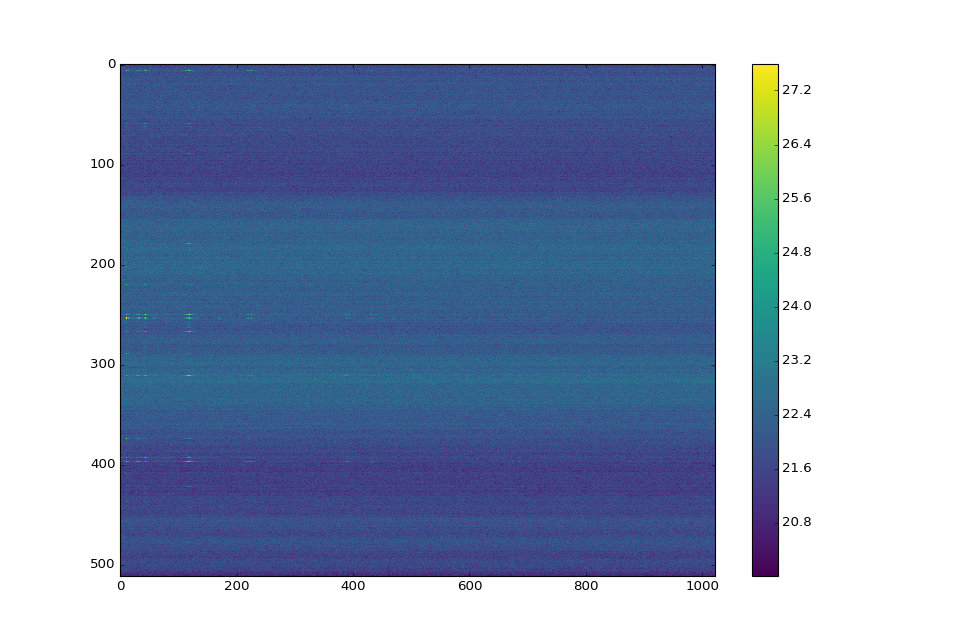

In [16]:
figure()
imshow(np.log(np.abs(auto[:,1:])),aspect='auto',cmap=cm.viridis,interpolation='nearest')
colorbar()

<IPython.core.display.Javascript object>


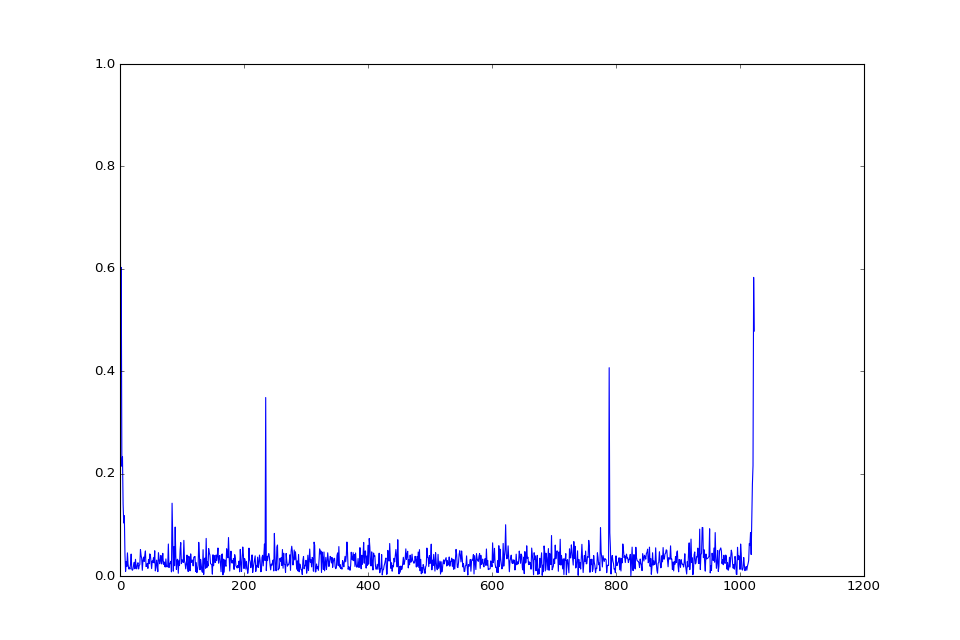

In [310]:
figure()
plot(np.abs(xcorr7[60,:]))

<IPython.core.display.Javascript object>


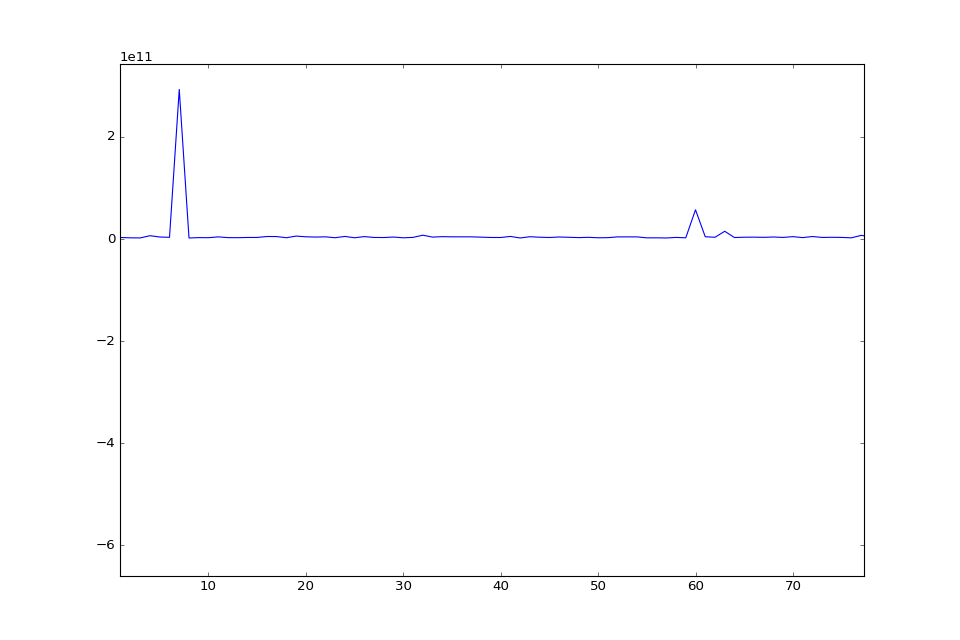

In [255]:
figure()
plot(auto[:,120])

<IPython.core.display.Javascript object>


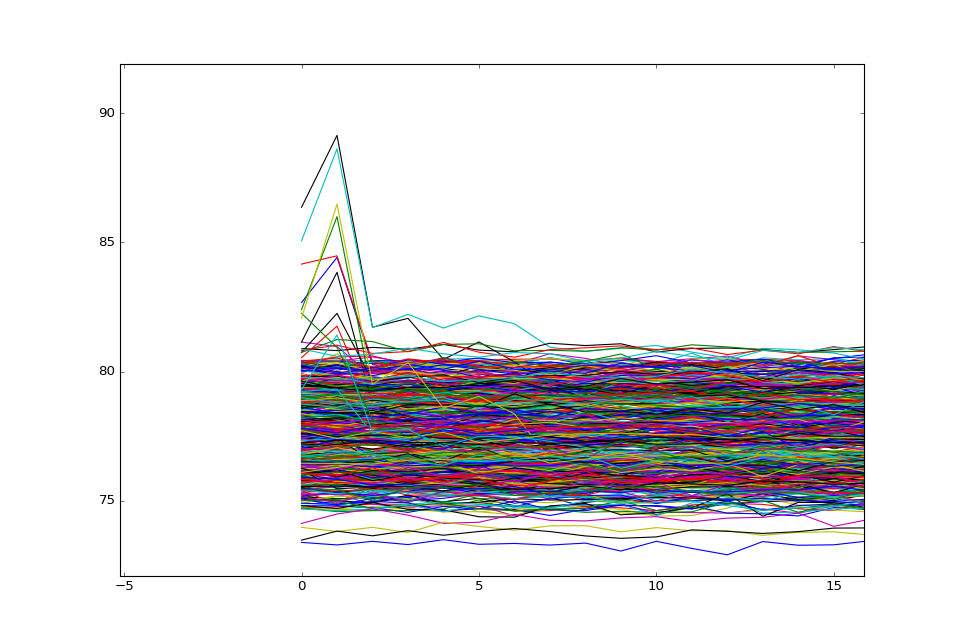

In [311]:
figure()
_=plot(10*np.log10(auto[:,1:]).T)

<IPython.core.display.Javascript object>


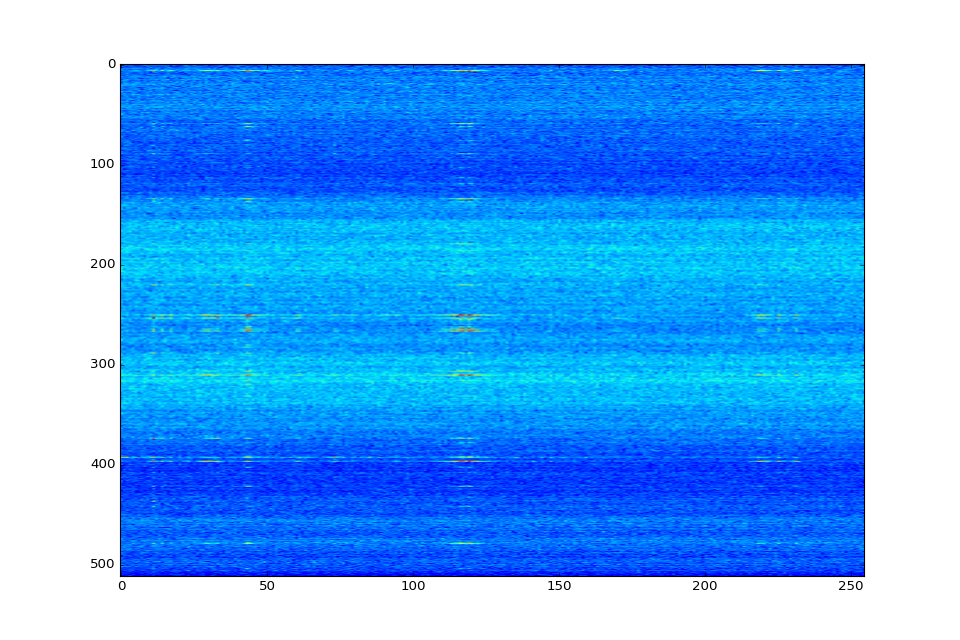

In [246]:
figure()
imshow(10*np.log10((np.abs(s21f)**2).mean(1)[:,1:256]),aspect='auto')

In [7]:
ssa.num_channels

512

In [256]:
ss = ssa.sweep_stream(7)

In [206]:
ss.resonator.fit()#(f_0 = 1191.48e6,Q=2e4,delay=0,A_mag=100,Q_e_real=3e4,Q_e_imag=0,A_slope=0,phi=0))

In [257]:
ss.resonator.current_params.pretty_print()

Name         Value      Min      Max   Stderr     Vary     Expr
A_mag        2.158        0      inf     None     True     None
A_slope   1.743e-05     -inf      inf     None     True     None
Q         6.37e+04    130.1 6.373e+04     None     True     None
Q_e_imag     -4119   -1e+07    1e+07     None     True     None
Q_e_real     1.085        1    1e+07     None     True     None
delay     6.688e-08     -inf      inf     None     True     None
f_0       9.956e+08 9.953e+08 9.961e+08     None     True     None
f_min     9.953e+08     -inf      inf     None    False     None
phi        -0.3176   -3.142    3.142     None     True     None


In [258]:
ss.resonator.current_result.redchi

67.983879728161256

<IPython.core.display.Javascript object>


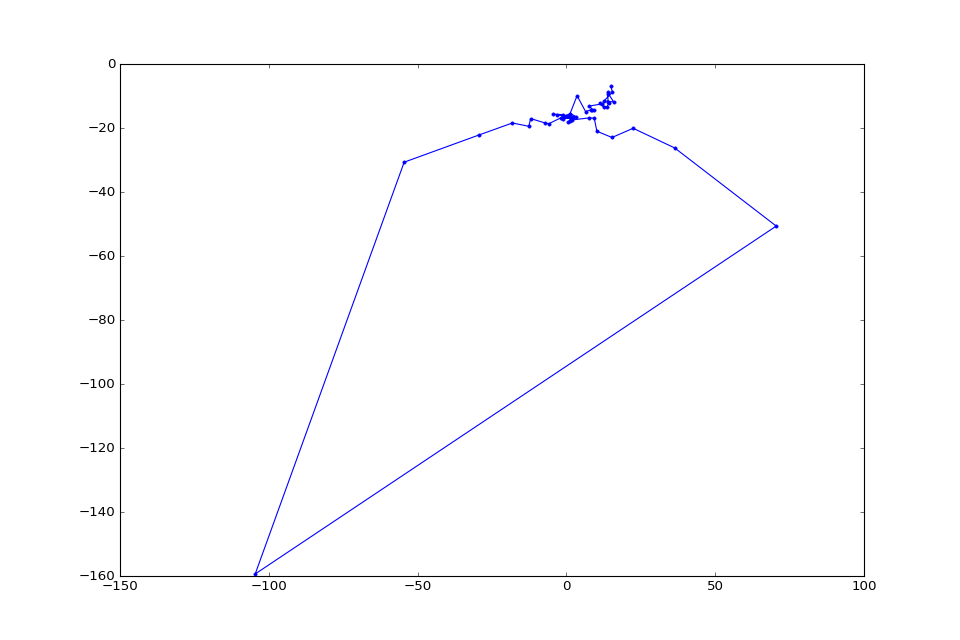

In [259]:
figure()
plot_ri(ss.sweep.s21_point,'.-')

<IPython.core.display.Javascript object>


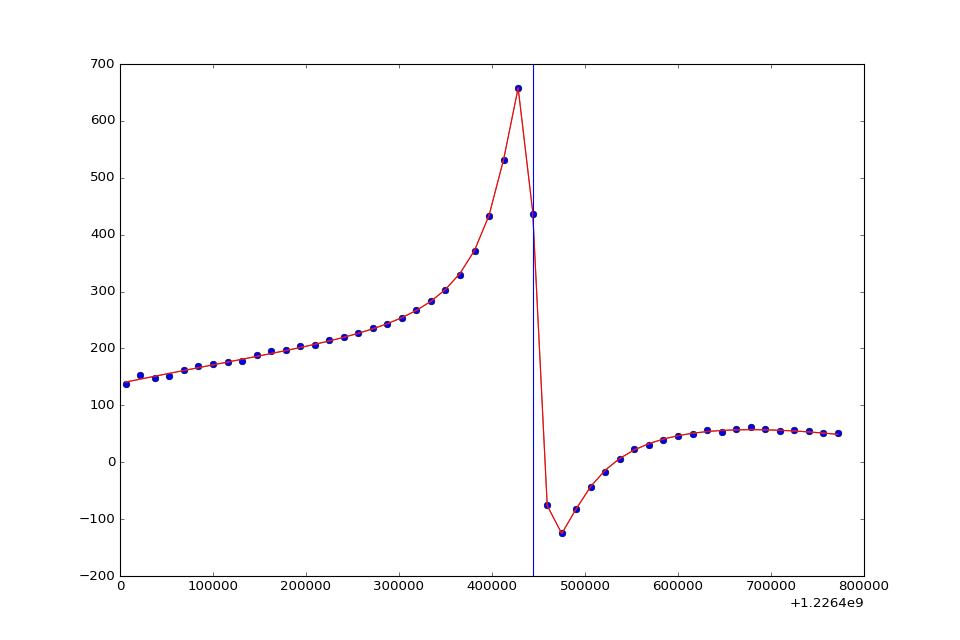

In [218]:
ss.resonator.plot()
axvline(ss.stream.frequency)

In [261]:
ss.set_q_and_x(deglitch=False)

In [262]:
ss.set_S(binned=True)

<IPython.core.display.Javascript object>


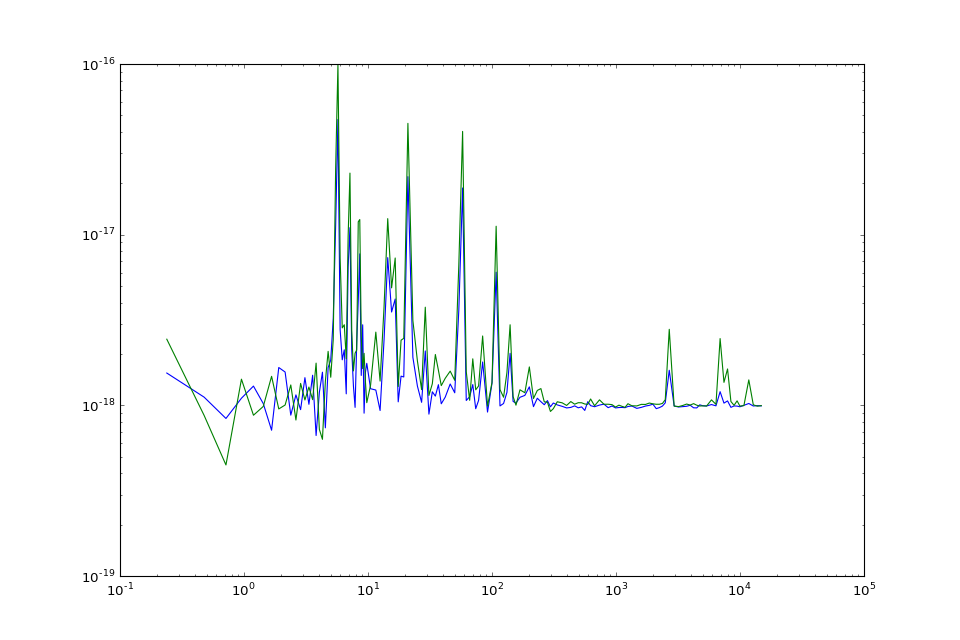

In [263]:
figure()

loglog(ss.S_frequency,ss.S_xx)
loglog(ss.S_frequency,ss.S_yy)

In [228]:
50*5**-2.7

0.6482626386771048

<IPython.core.display.Javascript object>


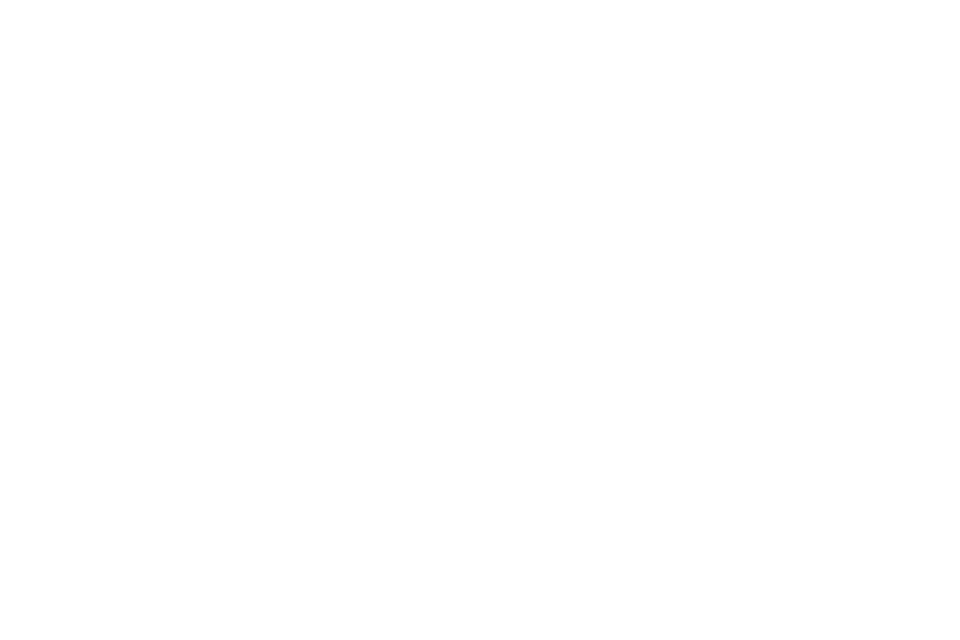

In [265]:
figure()
plot_ri((ss.stream.s21_raw))

<IPython.core.display.Javascript object>


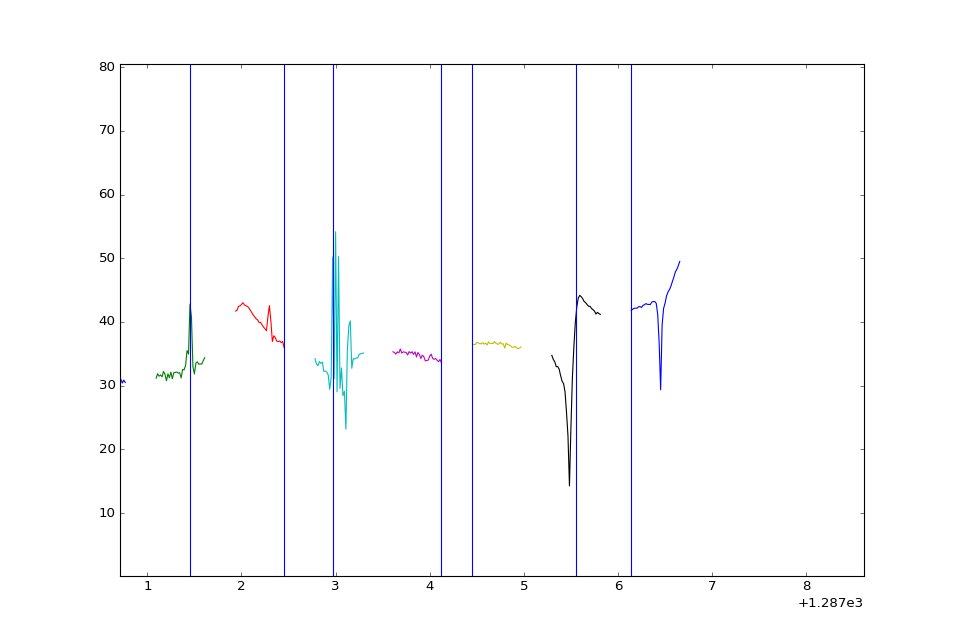

In [6]:
for k in range(sa.num_channels)[300:350]:
    swp = sa.sweep(k)
    plot(swp.frequency_MHz,dB(swp.s21_point))
    axvline(swp.resonator.f_0/1e6)

In [20]:
swp = sa.sweep(224)

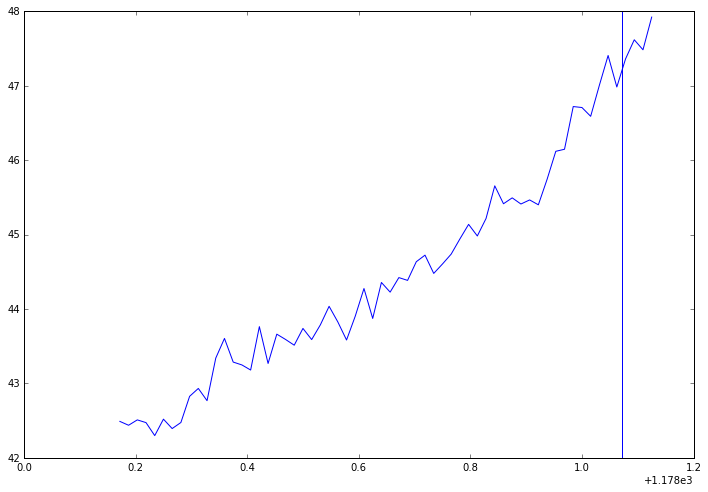

In [21]:
plot(swp.frequency_MHz,dB(swp.s21_point))
axvline(swp.resonator.f_0/1e6)

In [16]:
swp.resonator.Q_e

(14.563675566921722-20598.458602393046j)

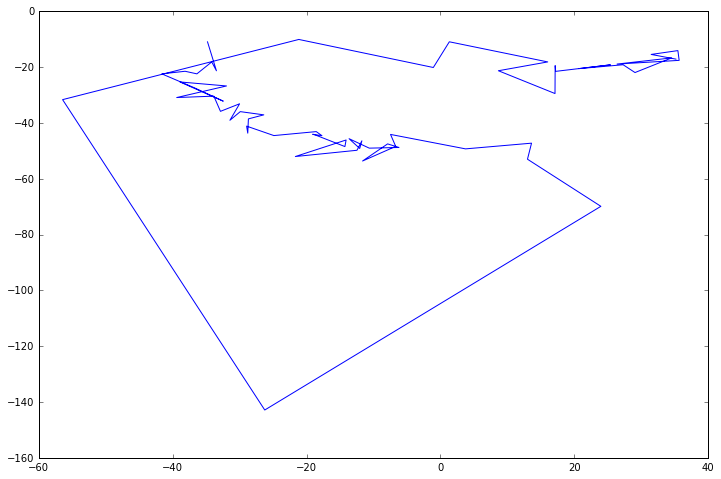

In [17]:
plot_ri(swp.s21_point)

In [17]:
5/2.

2.5

In [18]:
12/2.5

4.8

In [19]:
80/20.

4.0

In [23]:
16.3/4.

4.075

In [22]:
46/14.

3.2857142857142856

In [24]:
30/np.sqrt(1e9)

0.00094868329805051382

In [25]:
12*60*2

1440

In [29]:
30./(18*60)

0.027777777777777776

In [32]:
30./np.sqrt(1e9*40)

0.00014999999999999999

In [31]:
1440*0.0277

39.888

In [33]:
np.load('/artemis/readout/resonances/2016-01-30-SC-2015-04-WSPEC-MT-first-pass.npy')

array([  78.080078  ,   90.744141  ,   94.900391  ,  103.345703  ,
        107.158203  ,  116.142578  ,  124.501953  ,  125.791016  ,
        135.150391  ,  138.291016  ,  160.775391  ,  223.99414062])

In [35]:
200./np.sqrt(1e6*1)

0.20000000000000001